## Mounting Drive

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Downloading Dependencies

---



In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 25.9 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


## Fetching dataset from Roboflow API

---



**Original Dataset**

In [ ]:
import roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="2hkDy9D76e2SGJfyChor")
project = rf.workspace("neural-ocean").project("neural_ocean")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Neural_Ocean-3 in yolov8:: 100%|██████████| 10266/10266 [00:02<00:00, 4129.55it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Denoised Dataset**

In [ ]:
import roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="2hkDy9D76e2SGJfyChor")
project = rf.workspace("neural-ocean").project("neural_ocean")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


## Training

---



In [ ]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data={dataset.location}/data.yaml \
epochs=60 \ # Try different number of epochs and find where the loss curve is converging for best output
imgsz=640

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 894, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 481, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: ' #' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'task=detect', 'mode=train', 'model=yolov8s.pt', 'data=/content/Neural_Ocean-3/data.yaml', 'epochs=60', ' #', 'Try', 'different', 'number', 'of', 'epochs', 'and', 'find', 'where', 'the', 'loss', 'curve', 'is', 'converging', 'for', 'best', 'output']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'segment', 'obb', 'pose', 'classify'}
                MODE (required) is one of {'export', 'predict', 

## Testing

---



In [ ]:
!yolo task=detect \
mode=predict \
model=/content/drive/MyDrive/Models/Denoised_Dataset_60_Epochs.pt \
conf=0.25 \
source={dataset.location}/test/images

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 937, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 145, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 285, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 910, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 837, in torch_safe_load
    ckpt = torch.load(fi

## Run inference on random images

---



In [ ]:
!yolo predict model=/content/drive/MyDrive/Models/Denoised_Dataset_60_Epochs.pt source='/content/demo.jpg'

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 937, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 145, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 285, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 910, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 837, in torch_safe_load
    ckpt = torch.load(fi

## Visualize on Google Colab

---



In [ ]:
from google.colab.patches import cv2_imshow


image 1/1 /content/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.6e27d3429e5c183f0785e36626e232c2.jpg: 640x640 1 pbag, 1 plastic, 16.3ms
Speed: 2.5ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


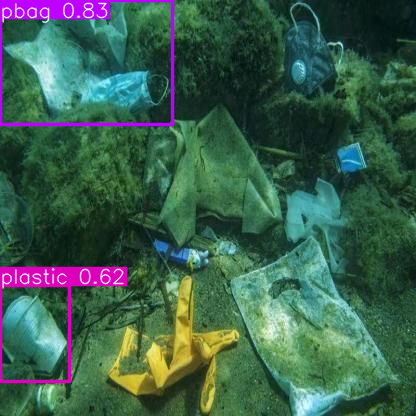

In [ ]:
# Load the model to inference on test images
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/60_epochs_denoised (1).pt')
results = model('/content/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.6e27d3429e5c183f0785e36626e232c2.jpg')  # predict on an image
res_plotted = results[0].plot()
cv2_imshow(res_plotted)